# Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# drive.mount("/content/gdrive", force_remount=True)
# drive.flush_and_unmount()

Mounted at /content/gdrive


In [ ]:
import os
workdir = os.getcwd()

In [ ]:
# Shuyan
# dataset_path = '/content/gdrive/My Drive/Documents/University Documents/Fourth Year/APS360/APS360 Project/GTSRB_dataset/new'
# Shihang
# dataset_path = '/content/gdrive/My Drive/APS360/APS360 Project/GTSRB_dataset/new'
# Evelyn
dataset_path = '/content/gdrive/My Drive/APS360H1 S/APS360 Project/GTSRB_dataset/new'
# Zian
# dataset_path =

In [ ]:
!cp -rv "$dataset_path" "$workdir"

Streaming output truncated to the last 5000 lines.
'/content/gdrive/My Drive/APS360H1 S/APS360 Project/GTSRB_dataset/new/new_train/06/00006_00000_00025.png' -> '/content/new/new_train/06/00006_00000_00025.png'
'/content/gdrive/My Drive/APS360H1 S/APS360 Project/GTSRB_dataset/new/new_train/06/00006_00002_00025.png' -> '/content/new/new_train/06/00006_00002_00025.png'
'/content/gdrive/My Drive/APS360H1 S/APS360 Project/GTSRB_dataset/new/new_train/06/00006_00003_00016.png' -> '/content/new/new_train/06/00006_00003_00016.png'
'/content/gdrive/My Drive/APS360H1 S/APS360 Project/GTSRB_dataset/new/new_train/06/00006_00003_00005.png' -> '/content/new/new_train/06/00006_00003_00005.png'
'/content/gdrive/My Drive/APS360H1 S/APS360 Project/GTSRB_dataset/new/new_train/06/00006_00012_00009.png' -> '/content/new/new_train/06/00006_00012_00009.png'
'/content/gdrive/My Drive/APS360H1 S/APS360 Project/GTSRB_dataset/new/new_train/06/00006_00000_00018.png' -> '/content/new/new_train/06/00006_00000_00018.

In [ ]:
dataset_path = os.path.join(workdir, "new")

In [ ]:
import os
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image
import torchvision
use_cuda = False

# get train_val_set path
updated_train_val_path = f'{dataset_path}/new_train'
updated_test_path = f'{dataset_path}/new_test'
updated_our_test_path = f'{dataset_path}/Updated_our_test'

In [ ]:
def get_data_loader(batch_size):
    classes = list(range(0, 43))
    ########################################################################
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose([
        transforms.RandomApply([transforms.RandomRotation(degrees=15)], p=0.5),  # Rotation
        transforms.RandomApply([transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))], p=0.5),  # Translation
        transforms.RandomApply([transforms.ColorJitter(brightness=0.2)], p=0.5),  # Brightness Variation
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
    )])

    folder_names = os.listdir(updated_train_val_path)
    folder_names.sort(key=lambda x: int(x))  # Sort folder names by their integer value

    # Now you create a mapping from class names to indices
    class_to_idx = {cls_name: i for i, cls_name in enumerate(folder_names)}

    train_val_set = torchvision.datasets.ImageFolder(
        root=updated_train_val_path,
        transform=transform
    )

    train_val_set.class_to_idx = class_to_idx

    print(train_val_set.class_to_idx)

    print(f'train_val_set size: {len(train_val_set)}')

    # Get the list of indices to sample from
    relevant_train_val_indices = list(range(len(train_val_set)))

    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_train_val_indices)
    split = int(len(relevant_train_val_indices) * 0.7) #split at 70%

    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_train_val_indices[:split], relevant_train_val_indices[split:]
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(train_val_set, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(train_val_set, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)

    return train_loader, val_loader, classes

In [ ]:
def get_test_data_loader(batch_size):
    classes = list(range(0, 43))
    ########################################################################
    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
    )])

    ### DATABASE TEST DATA ###
    folder_names = os.listdir(updated_test_path)
    folder_names.sort(key=lambda x: int(x))  # Sort folder names by their integer value

    # Now you create a mapping from class names to indices
    class_to_idx = {cls_name: i for i, cls_name in enumerate(folder_names)}

    # Load testing data
    test_set = torchvision.datasets.ImageFolder(
                        root=updated_test_path,
                        transform=transform_test
                    )

    test_set.class_to_idx = class_to_idx
    # Get the list of indices to sample from
    relevant_test_indices = list(range(len(test_set)))

    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_test_indices)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                              num_workers=1, sampler=test_sampler)

    ### OUR TEST DATA ###
    our_folder_names = os.listdir(updated_our_test_path)
    our_folder_names.sort(key=lambda x: int(x))  # Sort folder names by their integer value

    # Now you create a mapping from class names to indices
    our_class_to_idx = {cls_name: i for i, cls_name in enumerate(our_folder_names)}

    # Load testing data
    our_test_set = torchvision.datasets.ImageFolder(
                        root=updated_our_test_path,
                        transform=transform_test
                    )

    our_test_set.class_to_idx = our_class_to_idx
    # Get the list of indices to sample from
    relevant_our_test_set_indices = list(range(len(our_test_set)))

    np.random.shuffle(relevant_our_test_set_indices)
    our_test_sampler = SubsetRandomSampler(relevant_our_test_set_indices)
    our_test_loader = torch.utils.data.DataLoader(our_test_set, batch_size=batch_size,
                                                  num_workers=1, sampler=our_test_sampler)

    ### COMBINED TEST DATA ###
    combined_test_set = torch.utils.data.ConcatDataset([test_set, our_test_set])
    combined_test_sampler = SequentialSampler(combined_test_set)
    combined_test_loader = torch.utils.data.DataLoader(combined_test_set, batch_size=batch_size,
                                                        num_workers=1, sampler=combined_test_sampler)

    return test_loader, our_test_loader, combined_test_loader, classes

# Baseline Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting import torch.optim as optim
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler, SequentialSampler
import torchvision.transforms as transforms

torch.manual_seed(1) # set the random seed

###############################################################################
# Network Definition
# define a 3-layer artificial neural network
class Baseline(nn.Module):
  def __init__(self):
    super(Baseline, self).__init__()
    self.name = "baseline"
    self.layer1 = nn.Linear(224 * 224 * 3, 250)
    self.layer2 = nn.Linear(250, 100)
    self.layer3 = nn.Linear(100, 43)
  def forward(self, img):
    flattened = img.view(-1, 224 * 224 * 3)
    activation1 = F.relu(self.layer1(flattened))
    activation2 = F.relu(self.layer2(activation1))
    activation3 = self.layer3(activation2).squeeze(1)
    return activation3

In [ ]:
# helper functions
###############################################################################
# Evaluation
def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         acc: A scalar for the avg classification accuracy over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_acc = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        #############################################
        #To Enable GPU Usage - put imgs and labels (data) under GPU memory, cuda is NVidia GPU framework
        if use_cuda and torch.cuda.is_available():
          inputs = inputs.cuda()
          labels = labels.cuda()
        #############################################
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        pred = outputs.max(1, keepdim=True)[1]
        corr = pred.eq(labels.view_as(pred))
        total_acc += corr.sum().item()
        total_loss += loss.item()
        total_epoch += inputs.shape[0]
    acc = float(total_acc) / total_epoch
    loss = float(total_loss) / (i + 1)
    return acc, loss

###############################################################################
# Training Curve
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "/content/gdrive/My Drive/APS360H1 S/APS360 Project/Baseline_checkpoint/model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                                                                                          batch_size,
                                                                                                                          learning_rate,
                                                                                                                          epoch)
    return path

def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation accuracy/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_acc = np.loadtxt("{}_train_acc.csv".format(path))
    val_acc = np.loadtxt("{}_val_acc.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Accuracy")
    n = len(train_acc) # number of epochs
    plt.plot(range(1,n+1), train_acc, label="Train")
    plt.plot(range(1,n+1), val_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [ ]:
###############################################################################
# Training
def train_net(model, batch_size=64, learning_rate=0.01, num_epochs=1):
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    # train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    train_loader, val_loader, classes = get_data_loader(batch_size)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_acc = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_acc = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_acc = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
            #############################################

            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Evaluate
            total_train_loss += loss.item()
            pred = outputs.max(1, keepdim=True)[1]
            total_train_acc += pred.eq(labels.view_as(pred)).sum().item()
            total_epoch += inputs.shape[0]
        # train_err[epoch], train_loss[epoch] = evaluate(model, train_loader, criterion) # takes too much time
        train_acc[epoch] = float(total_train_acc) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_acc[epoch], val_loss[epoch] = evaluate(model, val_loader, criterion)
        print(("Epoch {}: Train acc: {}, Train loss: {} |"+
               "Validation acc: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_acc[epoch],
                   train_loss[epoch],
                   val_acc[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/val loss/acc into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_acc.csv".format(model_path), train_acc)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_acc.csv".format(model_path), val_acc)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)



---


# Execution

In [ ]:
baseline = Baseline()
if use_cuda and torch.cuda.is_available():
  baseline.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
batch = 512
lr = 0.001
epoch = 50
train_net(baseline, batch, lr, epoch)

CUDA is not available.  Training on CPU ...
{'00': 0, '01': 1, '02': 2, '03': 3, '04': 4, '05': 5, '06': 6, '07': 7, '08': 8, '09': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42}
train_val_set size: 22380
Epoch 1: Train acc: 0.06204915416533674, Train loss: 3.6340006782162573 |Validation acc: 0.10737155621742368, Validation loss: 3.507961630821228
Epoch 2: Train acc: 0.14618576444302586, Train loss: 3.3697674582081456 |Validation acc: 0.1742367833209233, Validation loss: 3.2410995108740672
Epoch 3: Train acc: 0.2106607085860198, Train loss: 3.1036410254816853 |Validation acc: 0.22397617274758005, Validation loss: 2.995987159865243
Epoch 4: Train acc: 0.26249601021385255, Train loss: 2.8551615668881323 |Va

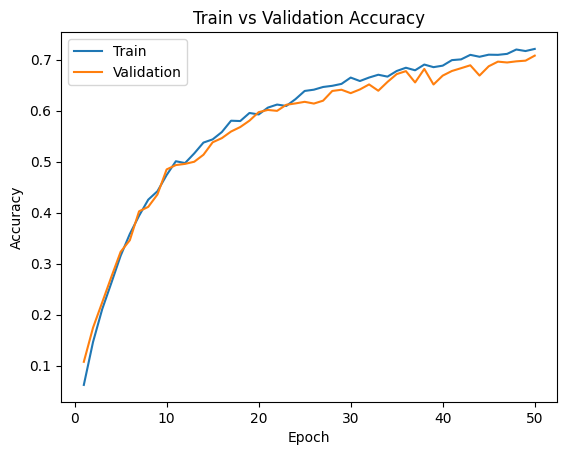

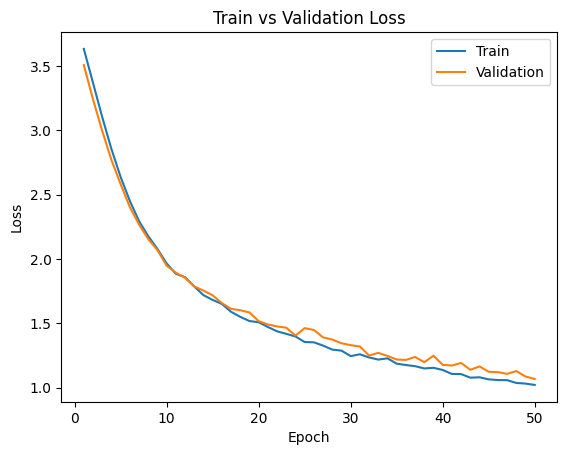

In [ ]:
path = get_model_name(baseline.name, batch, lr, epoch-1)
plot_training_curve(path)



---


# **Load Best Model**

In [ ]:
best_batch_size = 512

best_baseline = Baseline()
best_path = get_model_name(best_baseline.name, batch_size=best_batch_size, learning_rate=0.001, epoch=49)
state = torch.load(best_path)
best_baseline.load_state_dict(state)

<All keys matched successfully>

In [ ]:
# get test dataloader
test_loader, our_test_loader, combined_loader, cm_classes = get_test_data_loader(best_batch_size)

In [ ]:
test_loader.dataset.class_to_idx

{'00': 0,
 '01': 1,
 '02': 2,
 '03': 3,
 '04': 4,
 '05': 5,
 '06': 6,
 '07': 7,
 '08': 8,
 '09': 9,
 '10': 10,
 '11': 11,
 '12': 12,
 '13': 13,
 '14': 14,
 '15': 15,
 '16': 16,
 '17': 17,
 '18': 18,
 '19': 19,
 '20': 20,
 '21': 21,
 '22': 22,
 '23': 23,
 '24': 24,
 '25': 25,
 '26': 26,
 '27': 27,
 '28': 28,
 '29': 29,
 '30': 30,
 '31': 31,
 '32': 32,
 '33': 33,
 '34': 34,
 '35': 35,
 '36': 36,
 '37': 37,
 '38': 38,
 '39': 39,
 '40': 40,
 '41': 41,
 '42': 42}

In [ ]:
for idx, class_name in enumerate(cm_classes):
  print(idx, class_name)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42




---


# ["Load Best Model" First] Test Model Performance

## Database Test

In [ ]:
test_acc, test_loss = evaluate(best_baseline, test_loader, nn.CrossEntropyLoss())
print(f"test accuracy = {test_acc*100:.2f}% | test loss = {test_loss}")

test accuracy = 78.76% | test loss = 0.9068957964579264


## Our Test

In [ ]:
our_test_acc, our_test_loss = evaluate(best_baseline, our_test_loader, nn.CrossEntropyLoss())
print(f"our test accuracy = {our_test_acc*100:.2f}% | our test loss = {our_test_loss}")

our test accuracy = 43.03% | our test loss = 2.5431067943573


## Combined Test

In [ ]:
combined_test_acc, combined_test_loss = evaluate(best_baseline, combined_loader, nn.CrossEntropyLoss())
print(f"Combined test accuracy = {combined_test_acc*100:.2f}% | combined test loss = {combined_test_loss}")

Combined test accuracy = 75.67% | combined test loss = 1.1366964081923168




---


# ["Load Best Model" First] Confusion Matrix

In [ ]:
# def get_labels_and_predictions(model, loader, limit=3):
#   labels_list = []
#   predictions_list = []
#   for i, data in enumerate(loader):
#       if i == limit:
#         break
#       inputs, labels = data
#       predictions = model(inputs)
#       # print("start")
#       # print(len(predictions.flatten()))
#       # print("mid")
#       # print(len(labels.flatten()))
#       # print("end")
#       labels_list += labels.flatten().tolist()
#       predictions_list += predictions.tolist()
#   return labels_list, predictions_list

def get_labels_and_predictions(model, loader, limit=False):
  labels_list = []
  predictions_list = []
  for data in loader:
      inputs, labels = data
      predictions = model(inputs)
      labels_list += labels.clone().detach().numpy().flatten().tolist()
      predictions_list += np.argmax(predictions.clone().detach().numpy(), axis=1).tolist()
      if limit:
        break
  return labels_list, predictions_list

In [ ]:
true, pred = get_labels_and_predictions(best_baseline, combined_loader)

Confusion Matrix:
[[ 8 48  0 ...  1  1  0]
 [ 0 52  5 ...  2  0  1]
 [ 2  1 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 23 24]
 [ 0  0  0 ...  0  0 65]]


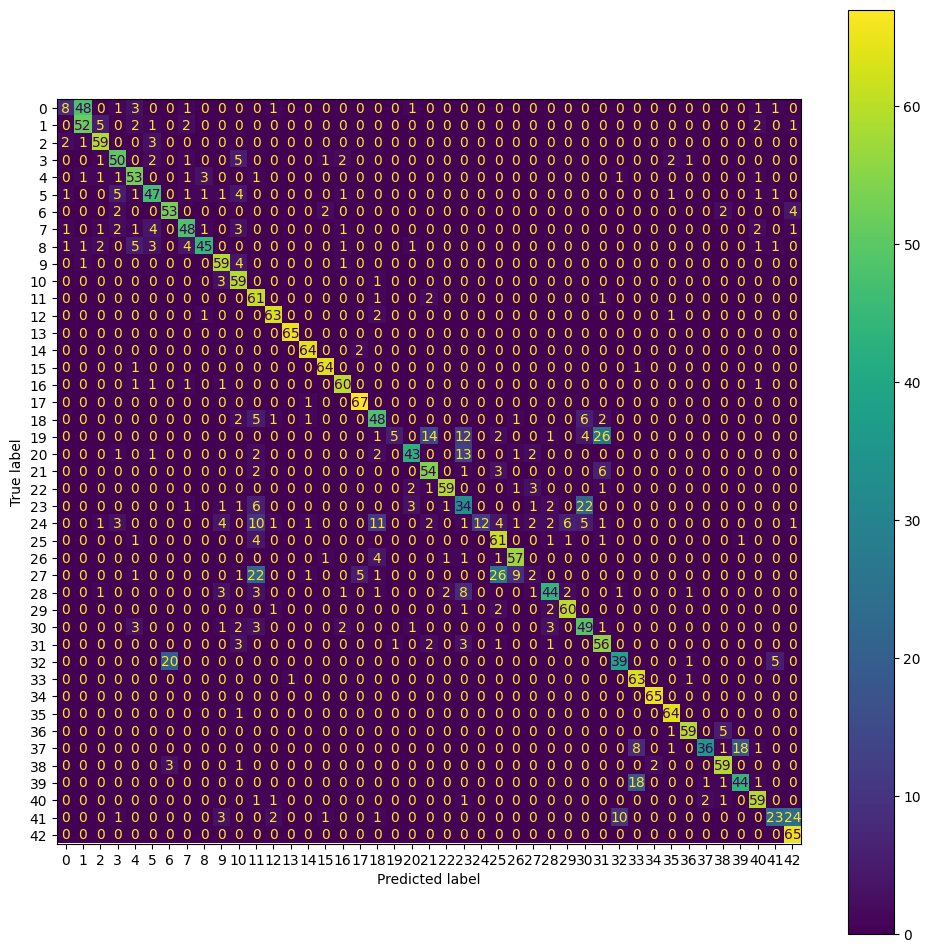

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true, pred)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(12,12))
ax = plt.gca()
disp.plot(ax=ax)
plt.show()